In [1]:
#\-- IMPORT MODULES, CLASSES AND METHODS --/#

import zipfile                          #############################
import os                               # || FILE SYSTEM / UTILS || #
import copy                             #############################
from prettytable import PrettyTable

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

import numpy as np                  ###################################
import pandas as pd                 # || EXPLORATIVE DATA ANALYSIS || #
import matplotlib.pyplot as plt     ###################################
import seaborn as sns
# https://towardsdatascience.com/handling-missing-data-like-a-pro-part-3-model-based-multiple-imputation-methods-bdfe85f93087 NumPyro, impyute,

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

import sklearn
import re
import importlib
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn import naive_bayes                         #########################
from sklearn import neural_network                      #  |-----------------|  #
from sklearn import svm                                 # || MODEL SELECTION || #
from sklearn import tree                                #  |-----------------|  #
from sklearn import linear_model                        #########################

# from PrunedCV import PrunedCV

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold     ##########################
from sklearn.model_selection import ParameterGrid       # || MODEL VALIDATION || #
                                                        ##########################

%matplotlib inline


In [6]:
#\-- SET ENVIRONMENT --/#
# Before starting we need to store the data properly. We define an ad-hoc folder where we will store everything.
main_PATH = os.getcwd()

# We check whether we already have the data.                        
if 'data' not in os.listdir():                                      
                                                                    
    # Unzip files.
    with zipfile.ZipFile(r'summer_project_dataset.zip') as zip_ref:

        os.mkdir(main_PATH + '/data')   # We create the 'data' directory,
        os.chdir(main_PATH + '/data')   # we change directory,
    
        data_PATH = os.getcwd()         # we get the data path
        zip_ref.extractall(data_PATH)   # and we unzip there.       #####################
                                                                    # || FILE SYSTEM || #    
    file_PATH = data_PATH + '/summer_project_dataset'               #####################

else:

    # We just build the paths.
    data_PATH = main_PATH + '/data'
    file_PATH = data_PATH + '/summer_project_dataset'

# Finally, we go back to our main path.
os.chdir(main_PATH)

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# We also set a seed for reproducibility purposes.      #####################
SEED = 42                                               # || RANDOM SEED || #
np.random.seed(SEED)                                    #####################

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# LaTeX style plots.
plt.rcParams['figure.figsize'] = (20, 8)
# plt.rcParams['text.usetex']    = True         ############################
# plt.rcParams['font.family']    = 'serif'      # || DEFAULT PARAMETERS || #
# plt.rcParams['font.size']      = '10'         ############################

pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_rows', 10)


In [59]:
#\-- DATASET LOADING AND PREPROCESSING --/#
# Here we can optionally specify the names of the features and their type; warmly suggested.
# cols_names = ['']
# some variables are stored as float, but they are actually int. Two reasons why:
#       -) nan values are considered as float --> first estimate them and then change the data type.
#       -) there are inconsistencies, especially in kw_max_min where some int values are float instead.
# for the moment just let's store everything as float, but further inspections are needed.

data_types = {
              'url' : str, 'timedelta' : int, 'shares' : int, 'data_channel' : str, 'weekday' : str, 
              
              'n_tokens_title'          : int, 'n_tokens_content'       : int, 'n_unique_tokens' : float, 'n_non_stop_words' : float,
              'n_non_stop_unique_tokens': float, 'average_token_length' : float,

              'num_hrefs' : int, 'num_self_hrefs' : int, 'num_imgs' : float, 'num_videos' : float,
              
              'kw_min_min' : float, 'kw_max_min' : float, 'kw_avg_min' : float, 'kw_min_max' : float, 'kw_max_max'   : float,
              'kw_avg_max' : float, 'kw_min_avg' : float, 'kw_max_avg' : float, 'kw_avg_avg' : float, 'num_keywords' : float,
              
              'self_reference_min_shares' : float, 'self_reference_max_shares' : float, 'self_reference_avg_sharess' : float,
              
              'LDA_00' : float, 'LDA_01' : float, 'LDA_02' : float, 'LDA_03' : float, 'LDA_04' : float,
              
              'global_subjectivity' : float, 'global_sentiment_polarity' : float, 'global_rate_positive_words' : float, 'global_rate_negative_words' : float,
              
              'rate_positive_words' : float, 'rate_negative_words' : float,
              
              'avg_positive_polarity' : float, 'min_positive_polarity' : float, 'max_positive_polarity' : float, 'avg_negative_polarity' : float,
              'min_negative_polarity' : float, 'max_negative_polarity' : float,

              'title_subjectivity' : float, 'title_sentiment_polarity' : float, 'abs_title_subjectivity' : float, 'abs_title_sentiment_polarity' : float,
              }                                                    
                                                                   
                                                                   
data = pd.read_csv(file_PATH + r'/development.csv',                 
                   usecols = lambda column: column != 'id', dtype = data_types)              
# data.info(), data.describe()
# data = pd.read_csv(file_PATH + r'/development.csv',                 
 #                    usecols = lambda column: column != 'id')
# data.dtypes
data
# TODO: TURN WEEKDAY INTO NUMBERS! One-hot encoding or something ordinal?

# ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# We select only the columns that are filled with float64. We do this because in this branch we are doing no preprocessing.
# X = data.loc[:, data.columns != 'review/overall']
# X = X.loc[:, 'review/appearance' : 'review/taste']
# y = data.loc[:, 'review/overall']                                           #######################
#                                                                             # || PREPROCESSING || #
# # We do this just to try StratifiedKFold. We need categorical variables.    #######################
# X = np.array(X)
# new_y = copy.deepcopy(y)
# new_y = np.array(np.where(new_y > 3, 1, 0))  # Here we just encode the numerical label into a categorical one.

# X_train, X_test, y_train, y_test = train_test_split(X, new_y, test_size = 0.20, random_state = SEED,
#                                                         shuffle = True, stratify = new_y
#                                                    )



,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,http://mashable.com/2014/09/08/safest-cabbies-...,121,12,1015,0.4220183482,0.9999999984,0.5450310551,10,6,33.0000000000,...,-0.1607142857,-0.5000000000,-0.0714285714,0.0000000000,0.0000000000,0.5000000000,0.0000000000,2900,bus,tuesday
1,http://mashable.com/2013/07/25/3d-printed-rifle/,532,9,503,0.5696969685,0.9999999967,0.7375415258,9,0,NaN,...,-0.1575000000,-0.2500000000,-0.1000000000,0.0000000000,0.0000000000,0.5000000000,0.0000000000,1300,tech,thursday
2,http://mashable.com/2013/10/30/digital-dinosau...,435,9,232,0.6460176963,0.9999999937,0.7484276682,12,3,4.0000000000,...,-0.4275000000,-1.0000000000,-0.1875000000,0.0000000000,0.0000000000,0.5000000000,0.0000000000,17700,lifestyle,wednesday
3,http://mashable.com/2014/08/27/homer-simpson-i...,134,12,171,0.7228915619,0.9999999906,0.8679245201,9,5,0.0000000000,...,-0.2166666667,-0.2500000000,-0.1666666667,0.4000000000,-0.2500000000,0.1000000000,0.2500000000,1500,bus,wednesday
4,http://mashable.com/2013/01/10/creepy-robotic-...,728,11,286,0.6526315767,0.9999999944,0.7999999956,5,2,NaN,...,-0.2517857143,-0.5000000000,-0.1000000000,0.2000000000,-0.1000000000,0.3000000000,0.1000000000,1400,tech,thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,http://mashable.com/2014/11/30/star-wars-guard...,37,11,440,0.5641025628,0.9999999964,0.7189780996,10,2,NaN,...,-0.2091666667,-0.3166666667,-0.0500000000,0.0000000000,0.0000000000,0.5000000000,0.0000000000,1000,world,tuesday
31711,http://mashable.com/2014/11/14/uk-floods/,52,14,0,0.0000000000,0.0000000000,0.0000000000,0,0,0.0000000000,...,0.0000000000,0.0000000000,0.0000000000,0.6666666667,-0.7000000000,0.1666666667,0.7000000000,11000,lifestyle,monday
31712,http://mashable.com/2014/09/08/paypal-bitcoin-...,121,9,969,0.4895833328,0.9999999982,0.7106227093,6,5,2.0000000000,...,-0.4000000000,-1.0000000000,-0.0500000000,0.0000000000,0.0000000000,0.5000000000,0.0000000000,2400,tech,tuesday
31713,http://mashable.com/2013/08/23/mashable-androi...,503,11,1976,0.4123076921,0.9999999991,0.6210801388,21,3,1.0000000000,...,-0.3234126984,-1.0000000000,-0.0500000000,0.7000000000,-0.4000000000,0.2000000000,0.4000000000,6000,lifestyle,friday


In [ ]:
# look at the values that the variable can assume.
# pd.set_option('display.float_format', '{:.10f}'.format)

# counts = data['num_imgs'].value_counts()
# print(counts)
# for value in data['kw_max_min']:
#     print(value)

In [60]:
# No missing values for most of the features. We can just replace 0 where we have some of them.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31715 entries, 0 to 31714
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url                           31715 non-null  object 
 1   timedelta                     31715 non-null  int64  
 2   n_tokens_title                31715 non-null  int64  
 3   n_tokens_content              31715 non-null  int64  
 4   n_unique_tokens               31715 non-null  float64
 5   n_non_stop_words              31715 non-null  float64
 6   n_non_stop_unique_tokens      31715 non-null  float64
 7   num_hrefs                     31715 non-null  int64  
 8   num_self_hrefs                31715 non-null  int64  
 9   num_imgs                      25340 non-null  float64
 10  num_videos                    25384 non-null  float64
 11  average_token_length          31715 non-null  float64
 12  num_keywords                  25397 non-null  float64
 13  k

In [25]:
# Probably most os the variable are correlated.
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,25340.000000,25384.000000,...,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000,31715.000000
mean,354.058206,10.390730,544.048179,0.530754,0.970140,0.672973,10.865143,3.274381,4.533899,1.259100,...,0.095466,0.756271,-0.259198,-0.521164,-0.107397,0.281647,0.069909,0.341805,0.155974,3407.068863
std,214.314223,2.115643,467.730448,0.137106,0.170203,0.154128,11.295386,3.822364,8.355645,4.176884,...,0.071362,0.247798,0.127508,0.290352,0.094932,0.323834,0.265514,0.188980,0.225957,11899.460219
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,4.000000
25%,163.000000,9.000000,246.000000,0.471276,1.000000,0.626028,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328333,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,338.000000,10.000000,409.000000,0.539568,1.000000,0.690909,7.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.252976,-0.500000,-0.100000,0.144444,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,713.000000,0.608523,1.000000,0.754644,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186111,-0.300000,-0.050000,0.500000,0.141667,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,1.000000,1.000000,1.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [36]:
data.select_dtypes(exclude='object')

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,121,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.0,1.0,...,0.100000,0.8,-0.160714,-0.500000,-0.071429,0.000000,0.000,0.500000,0.000,2900.0
1,532,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,NaN,1.0,...,0.136364,1.0,-0.157500,-0.250000,-0.100000,0.000000,0.000,0.500000,0.000,1300.0
2,435,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.0,1.0,...,0.375000,0.5,-0.427500,-1.000000,-0.187500,0.000000,0.000,0.500000,0.000,17700.0
3,134,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.0,NaN,...,0.500000,0.5,-0.216667,-0.250000,-0.166667,0.400000,-0.250,0.100000,0.250,1500.0
4,728,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,NaN,0.0,...,0.100000,0.6,-0.251786,-0.500000,-0.100000,0.200000,-0.100,0.300000,0.100,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31710,37,11.0,440.0,0.564103,1.0,0.718978,10.0,2.0,NaN,NaN,...,0.033333,0.2,-0.209167,-0.316667,-0.050000,0.000000,0.000,0.500000,0.000,1000.0
31711,52,14.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,0.000000,0.666667,-0.700,0.166667,0.700,11000.0
31712,121,9.0,969.0,0.489583,1.0,0.710623,6.0,5.0,2.0,1.0,...,0.062500,1.0,-0.400000,-1.000000,-0.050000,0.000000,0.000,0.500000,0.000,2400.0
31713,503,11.0,1976.0,0.412308,1.0,0.621080,21.0,3.0,1.0,3.0,...,0.100000,1.0,-0.323413,-1.000000,-0.050000,0.700000,-0.400,0.200000,0.400,6000.0


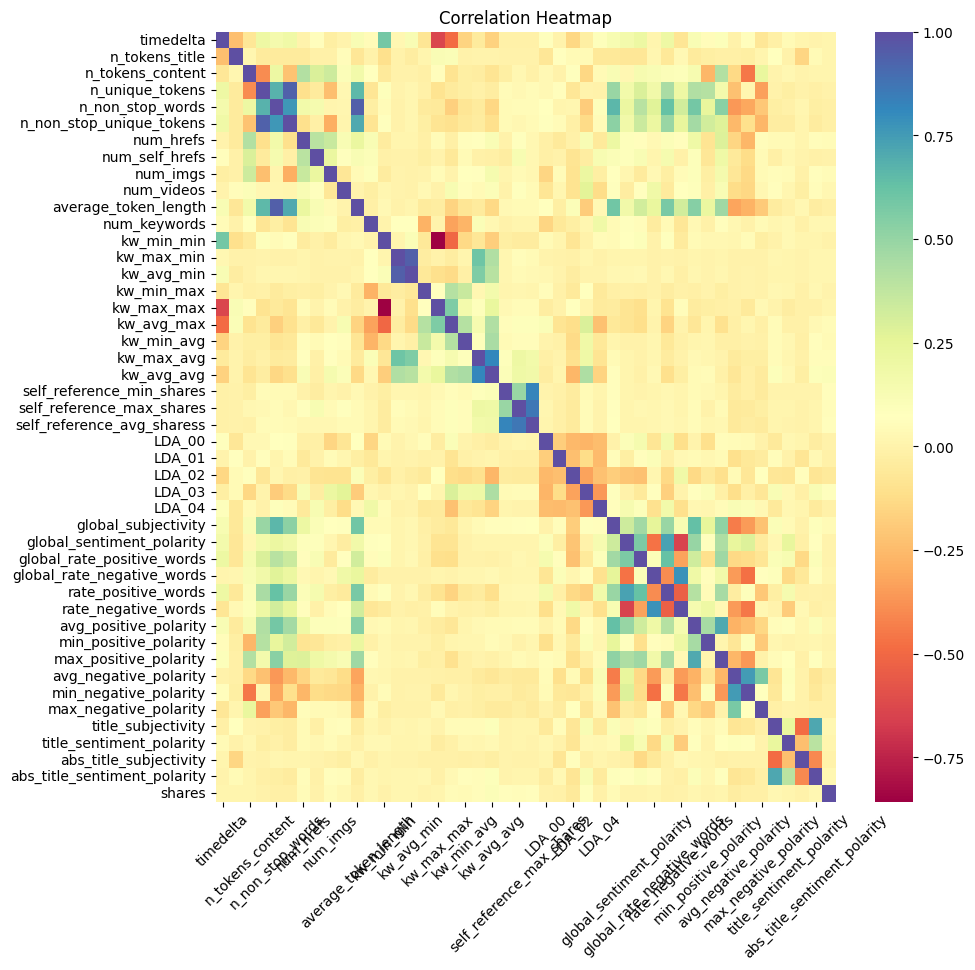

In [63]:
# Quick and dirty to look for correlations.

# Calculate the correlation matrix
correlation_matrix = data.select_dtypes(exclude='object').corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))  # Set the figure size
sns.heatmap(correlation_matrix, cmap='Spectral')

# Customize the plot
plt.title('Correlation Heatmap')  # Add a title
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability

# Display the heatmap
plt.show()


array([[<Axes: title={'center': 'timedelta'}>,
        <Axes: title={'center': 'n_tokens_title'}>,
        <Axes: title={'center': 'n_tokens_content'}>],
       [<Axes: title={'center': 'n_unique_tokens'}>,
        <Axes: title={'center': 'n_non_stop_words'}>,
        <Axes: title={'center': 'n_non_stop_unique_tokens'}>],
       [<Axes: title={'center': 'num_hrefs'}>,
        <Axes: title={'center': 'num_self_hrefs'}>,
        <Axes: title={'center': 'num_imgs'}>]], dtype=object)

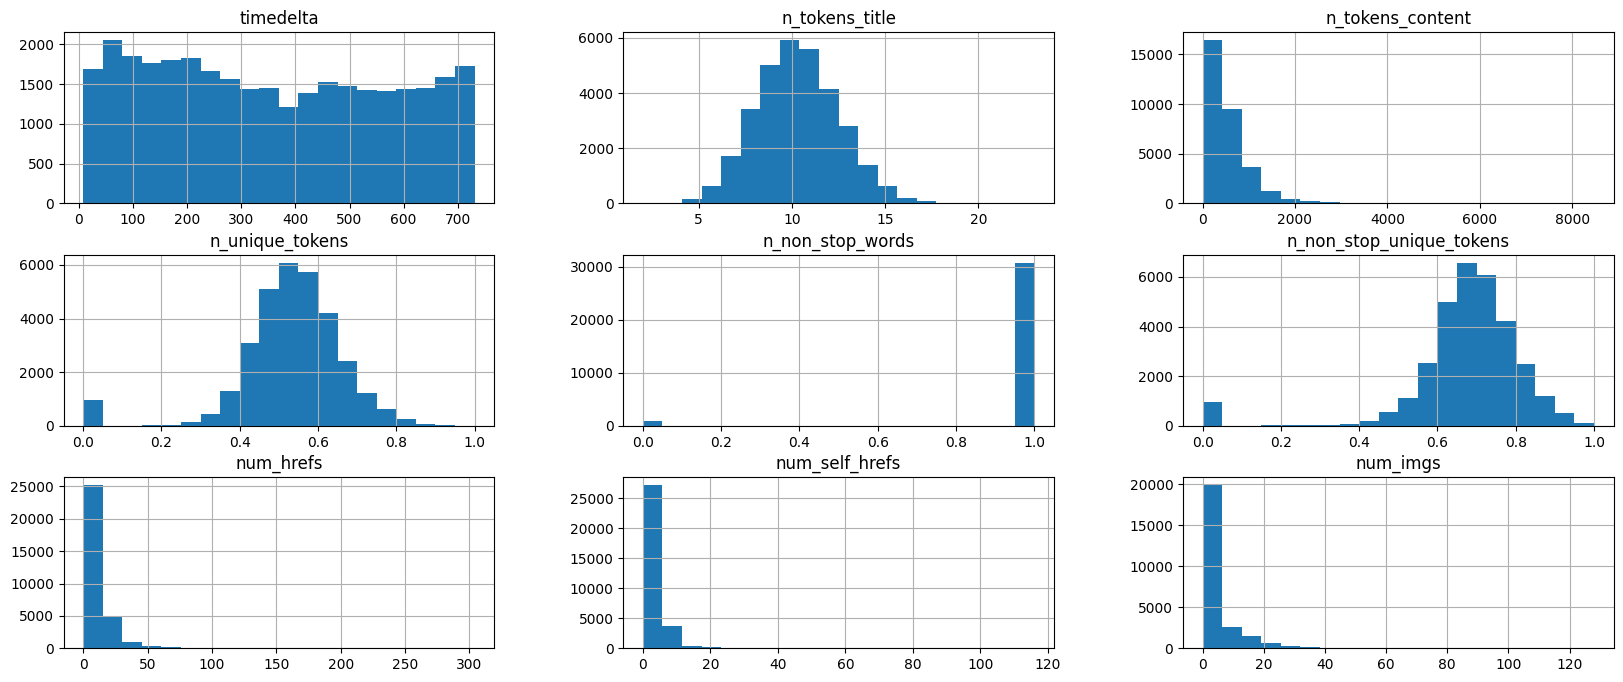

In [77]:
data.iloc[:, 0: 10].hist(bins = 20)

# 0:10 columns:
# timedelta                <-- close to UNIFORM
# n_tokens_title           <-- close to NORMAL
# n_tokens_content s       <-- skewed, OUTLIERS
# n_unique_tokens          <-- close to NORMAL
# n_non_stop_words         <-- BINARY 0-1
# n_non_stop_unique_tokens <-- close to NORMAL, check strange values close to zero
# num_hrefs                <-- skewed, OUTLIERS
# num_self_hrefs           <-- skewed, OUTLIERS
# num_imgs                 <-- skewed, OUTLIERS

# SUMMARY
# Lot of OUTLIERS, it should be possible to STANDARDIZE (all close to NORMAL) and apply the LOGARITHM (close to LOGNORMAL).

array([[<Axes: title={'center': 'num_videos'}>,
        <Axes: title={'center': 'average_token_length'}>,
        <Axes: title={'center': 'num_keywords'}>],
       [<Axes: title={'center': 'kw_min_min'}>,
        <Axes: title={'center': 'kw_max_min'}>,
        <Axes: title={'center': 'kw_avg_min'}>],
       [<Axes: title={'center': 'kw_min_max'}>,
        <Axes: title={'center': 'kw_max_max'}>,
        <Axes: title={'center': 'kw_avg_max'}>]], dtype=object)

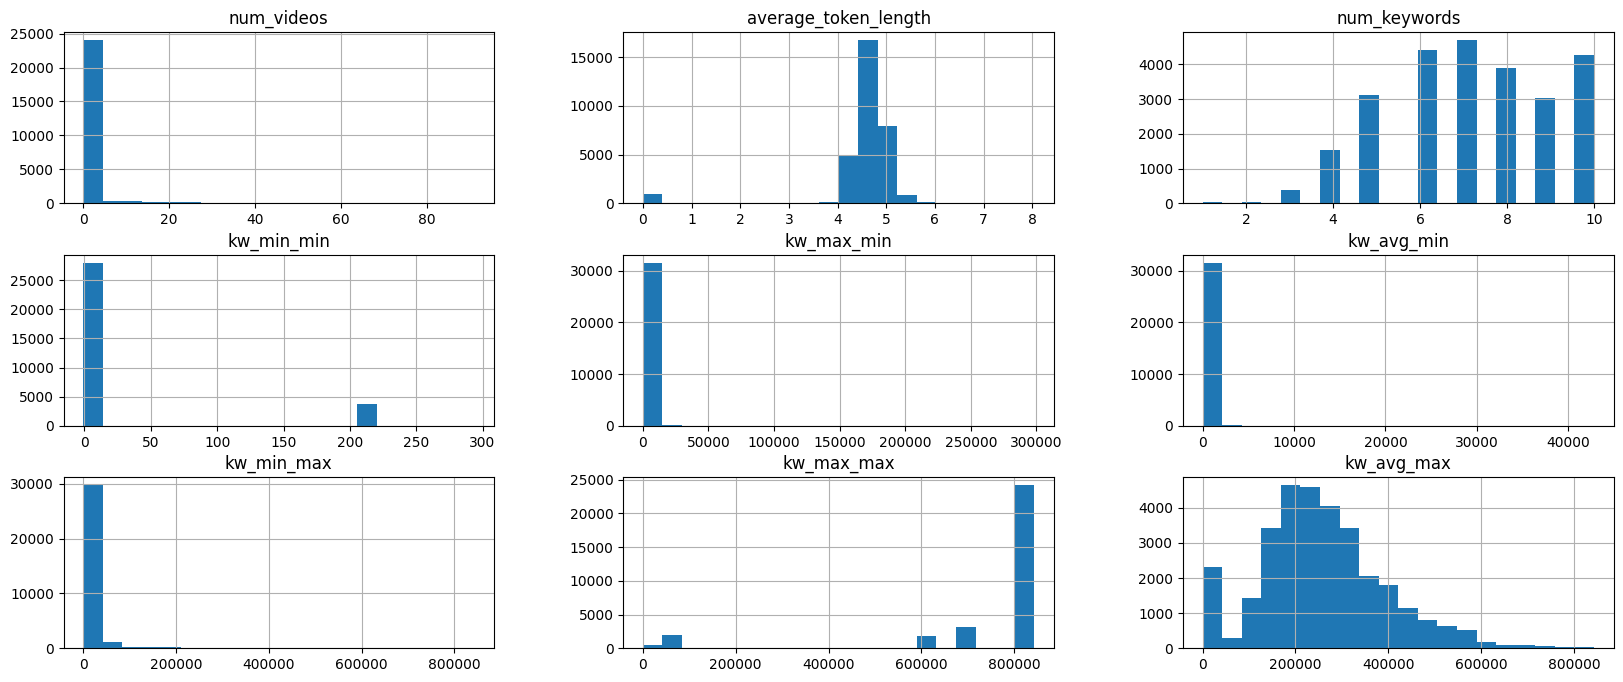

In [78]:
data.iloc[:, 10: 19].hist(bins = 20)

# 10:19 columns:
# num_video                <-- skewed, OUTLIERS
# average_token_length     <-- close to NORMAL, check ZERO
# num_keywords             <-- seems BIMODAL
# kw_min_min               <-- seems BINARY
# kw_max_min               <-- OUTLIERS
# kw_avg_min               <-- OUTLIERS
# kw_min_max               <-- skewed, OUTLIERS
# kw_max_max               <-- skewed, OUTLIERS
# kw_avg_max               <-- close to NORMAL, consider LOGARITM

# SUMMARY
# Lot of OUTLIERS, it should be convenient to apply the LOGARITHM (all positive).

array([[<Axes: title={'center': 'kw_max_avg'}>,
        <Axes: title={'center': 'kw_avg_avg'}>,
        <Axes: title={'center': 'self_reference_min_shares'}>],
       [<Axes: title={'center': 'self_reference_max_shares'}>,
        <Axes: title={'center': 'self_reference_avg_sharess'}>,
        <Axes: title={'center': 'LDA_00'}>],
       [<Axes: title={'center': 'LDA_01'}>,
        <Axes: title={'center': 'LDA_02'}>,
        <Axes: title={'center': 'LDA_03'}>]], dtype=object)

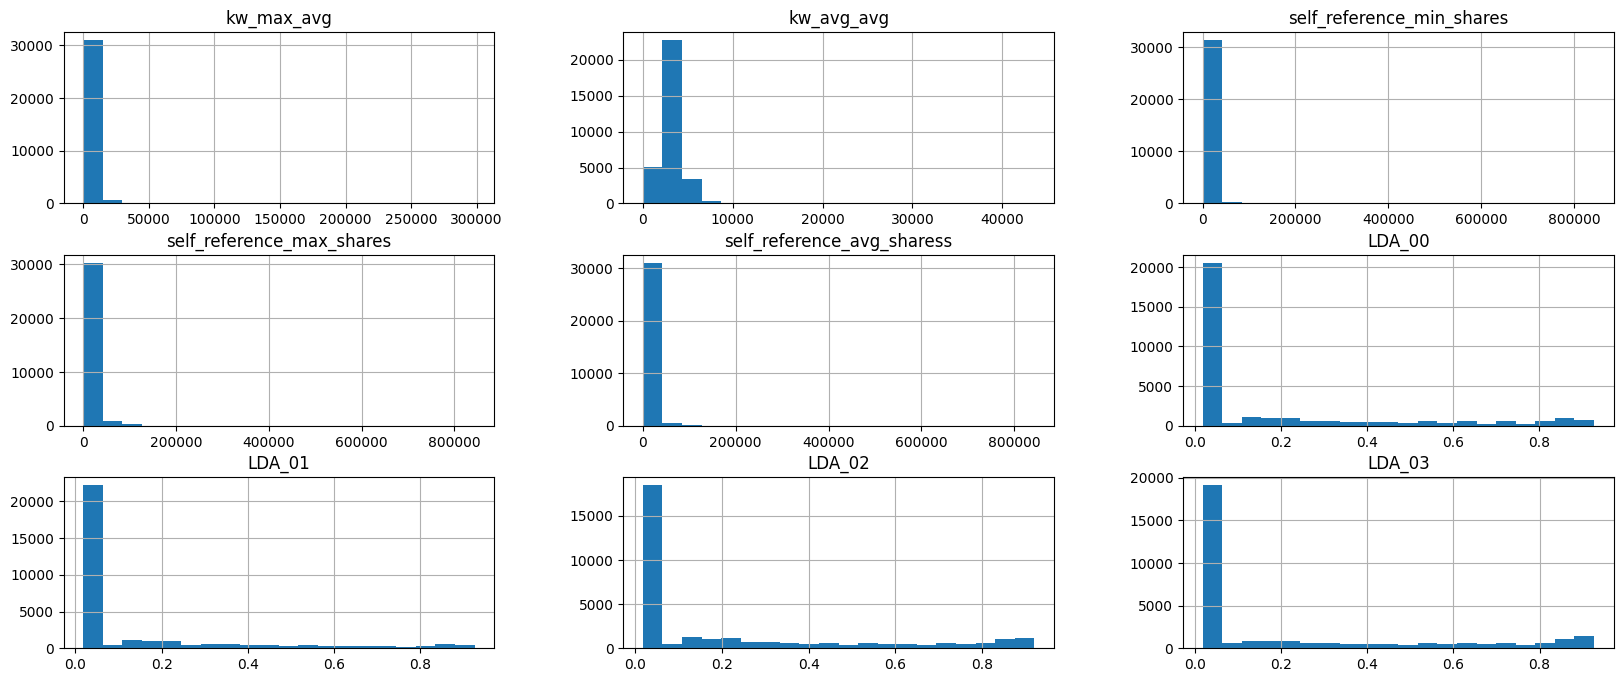

In [79]:
data.iloc[:, 20: 29].hist(bins = 20)

# 20:29 columns:
# kw_max_avg                <-- skewed, OUTLIERS
# kw_avg_avg                <-- skewed, OUTLIERS
# self_reference_min_shares <-- skewed, OUTLIERS
# self_reference_max_shares <-- skewed, OUTLIERS
# self_reference_avg_shares <-- skewed, OUTLIERS
# LDA_00                    <-- skewed, seems UNIFORM
# LDA_01                    <-- skewed, seems UNIFORM
# LDA_02                    <-- skewed, seems UNIFORM
# LDA_03                    <-- skewed, seems UNIFORM

# SUMMARY
# All skewed and POSITIVE. Lot of OUTLIERS and UNIFORM behaviours.

array([[<Axes: title={'center': 'global_subjectivity'}>,
        <Axes: title={'center': 'global_sentiment_polarity'}>,
        <Axes: title={'center': 'global_rate_positive_words'}>],
       [<Axes: title={'center': 'global_rate_negative_words'}>,
        <Axes: title={'center': 'rate_positive_words'}>,
        <Axes: title={'center': 'rate_negative_words'}>],
       [<Axes: title={'center': 'avg_positive_polarity'}>,
        <Axes: title={'center': 'min_positive_polarity'}>,
        <Axes: title={'center': 'max_positive_polarity'}>]], dtype=object)

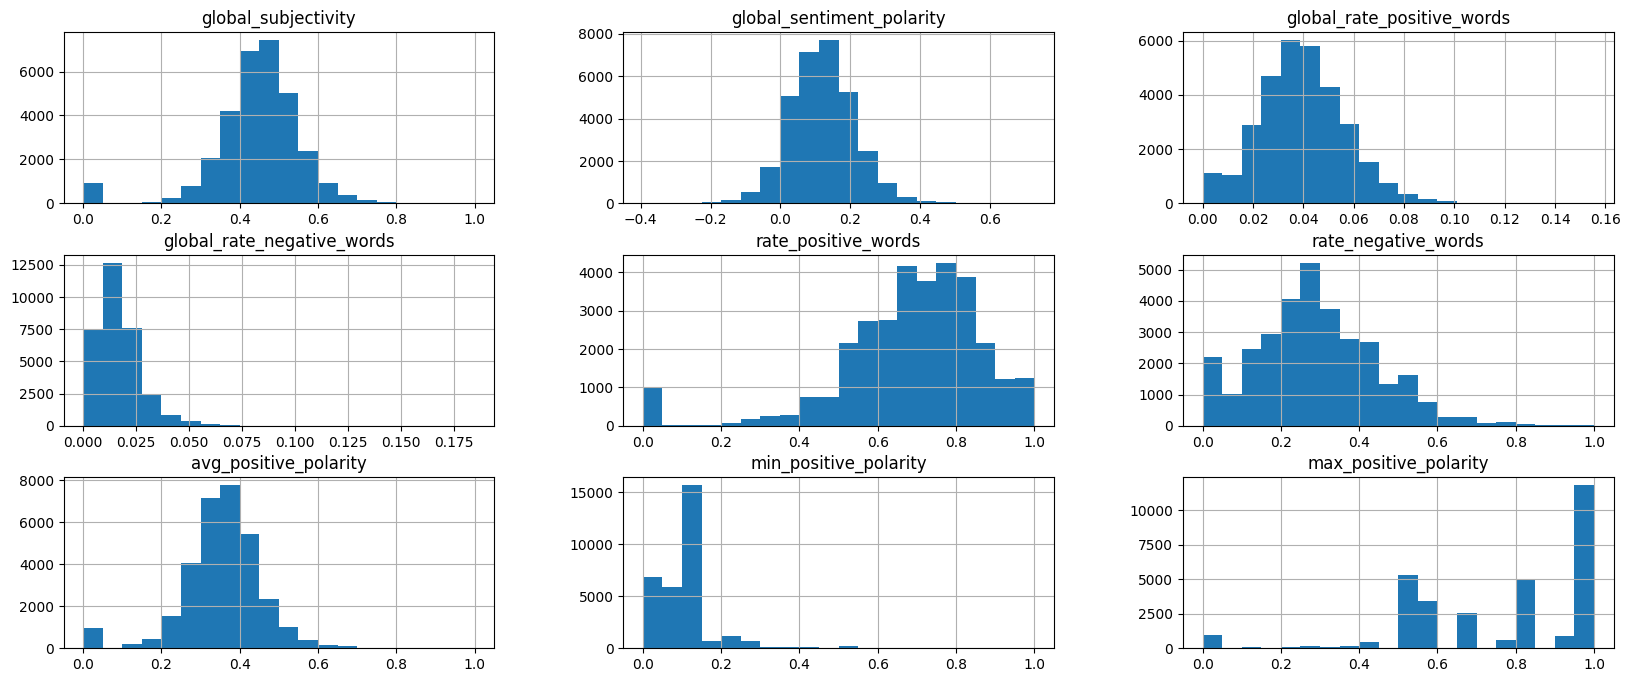

In [80]:
data.iloc[:, 30: 39].hist(bins = 20)

# 30:39 columns:
# global_subjectivity        <-- close to NORMAL
# global_sentiment_polarity  <-- close to NORMAL
# global_rate_positive_words <-- close to NORMAL, OUTLIERS
# global_rate_negative_words <-- skewed, OUTLIERS
# rate_positive_words        <-- skewed
# rate_negative_words        <-- skewed
# avg_positive_polarity      <-- close to NORMAL
# min_positive_polarity      <-- skewed, OUTLIERS
# max_positive_polarity      <-- skewed

# SUMMARY
# All skewed and close to NORMAL.

array([[<Axes: title={'center': 'min_negative_polarity'}>,
        <Axes: title={'center': 'max_negative_polarity'}>,
        <Axes: title={'center': 'title_subjectivity'}>],
       [<Axes: title={'center': 'title_sentiment_polarity'}>,
        <Axes: title={'center': 'abs_title_subjectivity'}>,
        <Axes: title={'center': 'abs_title_sentiment_polarity'}>],
       [<Axes: title={'center': 'shares'}>, <Axes: >, <Axes: >]],
      dtype=object)

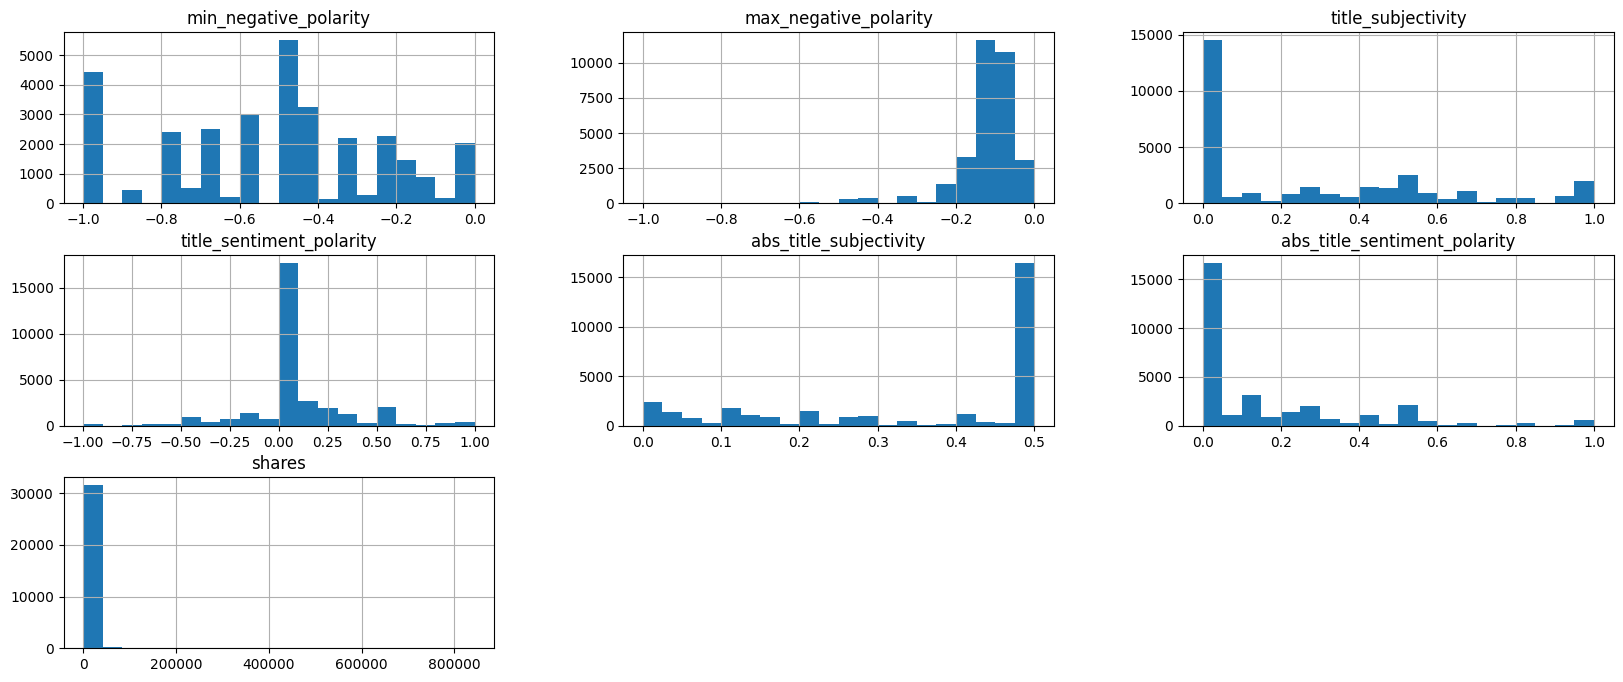

In [81]:
data.iloc[:, 40: 49].hist(bins = 20)

# 40:49 columns:
# min_negative_polarity        <-- close to NORMAL (?)
# max_negative_polarity        <-- skewed, OUTLIERS
# title_subjectivity           <-- skewed, seems UNIFORM
# title_sentiment_polarity     <-- close to NORMAL, OUTLIERS
# abs_title_subjectivity       <-- cyclical behaviour
# abs_title_sentiment_polarity <-- cyclical behaviour
# shares                       <-- OUTLIERS

# SUMMARY
# Lot of skewness and weird distributions.